<a href="https://colab.research.google.com/github/KenzieLeonic/New_York_Airbnb_OpenData_Starter/blob/main/new_york_project_complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import libraries

In [ ]:
import pandas as pd 
import numpy as np 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Data Dictionary (data detail EN to TH)

Sources =  https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data 


number of columns | columns name
0. id : id เป็นตัวแปรประเภท ตัวเลข
1. name : ชื่อบ้านเช้า เป็นตัวแปรประเภท string
2. host_id : หลายเลขเจ้าของบ้าน ตัวแปรประเภท string
3. host_name : ชื่อเจ้าของบ้าน เป็นตัวแปรประเภท string
4. neighbourhood_group : เขตการปกครองท้องถิ่นใน New York เป็นตัวแปรประเภท string 
- Manhattan = แมนแฮตตัน
- Brooklyn = บรุกลิน
- Queens = ควีน
- Bronx = บร็องซ์ 
- Staten Island = เกาะสแตเทน  

5. neighbourhood : พื้นที่ใกล้กับที่พัก เป็นตัวแปรประเภท string 
6. latitude : พิกัดละติจูด เป็นตัวแปรประเภททศนิยม
7. longitude : พิกัดลองจิจูด เป็นตัวแปรประเภททศนิยม
8. room_type : ประเภทห้องพัก เป็นตัวแปรประเภท string
- Entire home/apt = บ้านหรืออพาร์ตเมนต์  
- Private room = ห้องส่วนตัว
- Shared room = ห้องแชร์ 
9. price : ราคาที่พัก เป็นตัวแปรประเภท float 
10. minimum_nights: คืนที่นอนค้างน้อยที่สุด เป็นตัวแปรประเภทตัวเลข
11. number_of_reviews : จำนวนคนที่มารีวิว เป็นตัวแปรประเภทตัวเลข
12. last_review : วันที่ลูกค้าเขียนรีวิวล่าสุด เป็นตัวแปรประเภทวันที่ 
13. reviews_per_month: จำนวนคนที่มารีวิวต่อเดือน เป็นตัวแปรประเภททศนิยม
14. calculated_host_listings_count : จำนวนรายการต่อเจ้าของบ้าน เป็นตัวแปรประเภทตัวเลข 
15. availability_365 : จำนวนวันที่ทำการเปิดจองที่พัก เป็นตัวแปรประเภทตัวเลข

## Open file 'AB_NYC_2019.csv'

In [ ]:
nyc_booking_df = pd.read_csv('AB_NYC_2019.csv')
nyc_booking_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [ ]:
nyc_booking_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

## Change Variable Type 
for changing variable

In [ ]:
nyc_booking_df['neighbourhood_group']= nyc_booking_df['neighbourhood_group'].astype("category")
nyc_booking_df['room_type'] = nyc_booking_df['room_type'].astype("category")
nyc_booking_df['last_review'] = pd.to_datetime(nyc_booking_df['last_review'],format = '%Y-%m-%d')

## Checking data in dataset

In [ ]:
#check that there has NaN in this dataset
nyc_booking_df.isna().sum() # count NaN

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
nyc_booking_df.value_counts('id')

id
2539        1
25583366    1
25551687    1
25552076    1
25554120    1
           ..
13121809    1
13122135    1
13122318    1
13122932    1
36487245    1
Length: 48895, dtype: int64

In [ ]:
nyc_booking_df.value_counts('name').sort_index()

name
 1 Bed Apt in Utopic Williamsburg                   1
 2-3 bedroom UWS garden triplex                     1
 3 bedroom loft in Williamsburg                     1
 A charming Space in Brooklyn                       1
 AMAZING TIME SQUARE!!BRICK WALLS!!                 1
                                                   ..
한성 韓城 Han B (2F)                                    1
한성 韓城 Han C (2F)                                    1
️CENTRALLY LOCATED️- Great for Families + Groups    1
ｳｨﾘｱﾑｽﾞﾊﾞｰｸﾞのかわいいお部屋です2                             1
ﾏﾝﾊｯﾀﾝ､駅から徒歩4分でどこに行くのにも便利な場所!女性の方希望,ｷﾚｲなお部屋｡        1
Length: 47905, dtype: int64

In [ ]:
nyc_booking_df.value_counts('host_id')

host_id
219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
            ... 
13540183       1
13538150       1
13535952       1
13533446       1
274321313      1
Length: 37457, dtype: int64

In [ ]:
nyc_booking_df.value_counts('host_name')

host_name
Michael         417
David           403
Sonder (NYC)    327
John            294
Alex            279
               ... 
Jerbean           1
Jerald            1
Jeonghoon         1
Jeny              1
현선                1
Length: 11452, dtype: int64

In [ ]:
nyc_booking_df.value_counts('neighbourhood_group')

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
dtype: int64

In [ ]:
nyc_booking_df.value_counts('neighbourhood')

neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Richmondtown             1
Willowbrook              1
Fort Wadsworth           1
New Dorp                 1
Woodrow                  1
Length: 221, dtype: int64

In [ ]:
nyc_booking_df.value_counts('latitude')

latitude
40.71813    18
40.68444    13
40.68634    13
40.69414    13
40.76189    12
            ..
40.72053     1
40.72032     1
40.72009     1
40.72001     1
40.91306     1
Length: 19048, dtype: int64

In [ ]:
nyc_booking_df.value_counts('longitude')

longitude
-73.95427    18
-73.95677    18
-73.95405    17
-73.94791    16
-73.95332    16
             ..
-73.91203     1
-73.91205     1
-73.91206     1
-73.91207     1
-73.71299     1
Length: 14718, dtype: int64

In [ ]:
nyc_booking_df.value_counts('room_type')

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
dtype: int64

In [ ]:
nyc_booking_df.value_counts('price')

price
100    2051
150    2047
50     1534
60     1458
200    1401
       ... 
362       1
361       1
805       1
814       1
578       1
Length: 674, dtype: int64

In [ ]:
nyc_booking_df.value_counts('minimum_nights')

minimum_nights
1       12720
2       11696
3        7999
30       3760
4        3303
        ...  
182         1
183         1
184         1
185         1
1250        1
Length: 109, dtype: int64

In [ ]:
nyc_booking_df.value_counts('number_of_reviews')

number_of_reviews
0      10052
1       5244
2       3465
3       2520
4       1994
       ...  
352        1
351        1
341        1
340        1
629        1
Length: 394, dtype: int64

In [ ]:
nyc_booking_df.value_counts('last_review')

last_review
2019-06-23    1413
2019-07-01    1359
2019-06-30    1341
2019-06-24     875
2019-07-07     718
              ... 
2015-01-07       1
2014-12-30       1
2014-12-22       1
2014-12-19       1
2011-03-28       1
Length: 1764, dtype: int64

In [ ]:
nyc_booking_df.value_counts('reviews_per_month')

reviews_per_month
0.02     919
1.00     893
0.05     893
0.03     804
0.16     667
        ... 
9.15       1
9.16       1
6.58       1
9.21       1
58.50      1
Length: 937, dtype: int64

In [ ]:
nyc_booking_df.value_counts('calculated_host_listings_count')
nyc_booking_df['calculated_host_listings_count'].max(),nyc_booking_df['calculated_host_listings_count'].mean()

(327, 7.143982002249719)

In [ ]:
nyc_booking_df.value_counts('availability_365')

availability_365
0      17533
365     1295
364      491
1        408
89       361
       ...  
195       26
196       24
183       24
181       23
202       20
Length: 366, dtype: int64

In [ ]:
nyc_booking_df.groupby('room_type')['price'].agg(['mean','min','max'])

,mean,min,max
room_type,,,
Entire home/apt,211.794246,0,10000
Private room,89.780973,0,10000
Shared room,70.127586,0,1800


## Cleaning Data

drop  minimum night above 365

In [ ]:
nyc_booking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48879 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48874 non-null  object        
 4   neighbourhood_group             48895 non-null  category      
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  category      
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

In [ ]:
nyc_booking_df = nyc_booking_df[nyc_booking_df['minimum_nights'] <= 365]
nyc_booking_df['reviews_per_month'] = nyc_booking_df['reviews_per_month'].fillna(value = 0)
nyc_booking_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaT,0.00,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaT,0.00,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaT,0.00,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaT,0.00,6,2


## Basic Analysis


### Checked the mean of rooms' price by neighbourhood_group and room_type
ตรวจสอบค่าเฉลี่ย ของค่าที่พัก ของแต่ละแวกบ้าน

In [ ]:
nyc_price_mean = nyc_booking_df.pivot_table(index = 'neighbourhood_group' , columns = 'room_type' , values = 'price' , aggfunc = np.mean)
nyc_price_mean

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.506596,66.788344,59.800000
Brooklyn,178.338181,76.508195,50.527845
Manhattan,249.257466,116.776622,88.933194
Queens,147.031996,71.762456,69.020202
Staten Island,173.846591,62.292553,57.444444


## Data Vislazation 

Compare the adverage , hightest and lowest rooms' price 

compare the room _types' in the mean price 

In [ ]:
nyc_max_price_room_mean = nyc_booking_df.groupby(['room_type']).price.mean() 
nyc_max_price_room_mean = nyc_max_price_room_mean.to_frame('price').reset_index()
nyc_max_price_room_mean['class'] = 'Mean'
nyc_max_price_room_mean

,room_type,price,class
0,Entire home/apt,211.806614,Mean
1,Private room,89.787026,Mean
2,Shared room,70.093184,Mean


compare the room _types' in the max price 

In [ ]:
nyc_max_price_room_max = nyc_booking_df.groupby(['room_type']).price.max()
nyc_max_price_room_max = nyc_max_price_room_max.to_frame('price').reset_index()
nyc_max_price_room_max['class'] = 'Max'
nyc_max_price_room_max

,room_type,price,class
0,Entire home/apt,10000,Max
1,Private room,10000,Max
2,Shared room,1800,Max


compare the room_types' in the min prices

In [ ]:
nyc_max_price_room_min = nyc_booking_df.groupby(['room_type']).price.min()
nyc_max_price_room_min = nyc_max_price_room_min.to_frame('price').reset_index()
nyc_max_price_room_min['class'] = 'Min'
nyc_max_price_room_min

,room_type,price,class
0,Entire home/apt,0,Min
1,Private room,0,Min
2,Shared room,0,Min


merge each 3 data 

In [ ]:
new_price_type = pd.concat([nyc_max_price_room_mean,nyc_max_price_room_max,nyc_max_price_room_min],axis = 0)
new_price_type

,room_type,price,class
0,Entire home/apt,211.806614,Mean
1,Private room,89.787026,Mean
2,Shared room,70.093184,Mean
0,Entire home/apt,10000.000000,Max
1,Private room,10000.000000,Max
2,Shared room,1800.000000,Max
0,Entire home/apt,0.000000,Min
1,Private room,0.000000,Min
2,Shared room,0.000000,Min


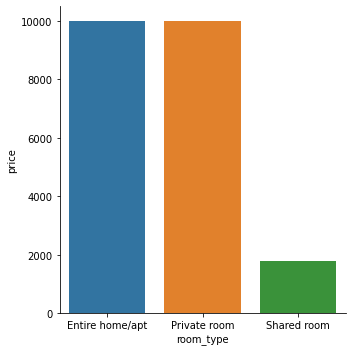

In [ ]:
sns.catplot(y = "price", x= "room_type", data=nyc_max_price_room_max, kind="bar")

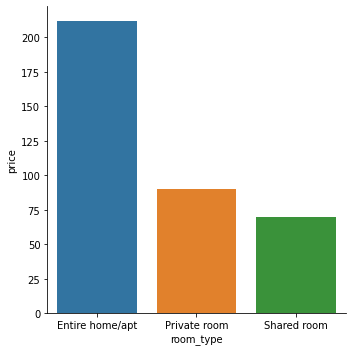

In [ ]:
sns.catplot(y= "price", x = "room_type", data=nyc_max_price_room_mean, kind="bar")

Compare the room's price by using neighbourhood_group, room_type, minimum_night, number_of_reviews



<Figure size 1080x432 with 0 Axes>

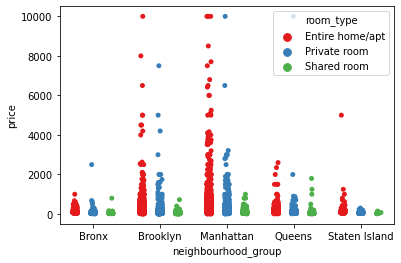

<Figure size 1080x432 with 0 Axes>

In [ ]:
sns.stripplot(x="neighbourhood_group", y="price",hue = 'room_type', data=nyc_booking_df,palette='Set1',dodge = True)
plt.figure(figsize=(15,6))

Compare the room's mean price by pivot the neighbourhood_group and room_type


In [ ]:
price_mean_group = nyc_booking_df.pivot_table(index = 'neighbourhood_group', values= 'price', columns = 'room_type', aggfunc = 'mean')
price_mean_group 

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.506596,66.788344,59.800000
Brooklyn,178.338181,76.508195,50.527845
Manhattan,249.257466,116.776622,88.933194
Queens,147.031996,71.762456,69.020202
Staten Island,173.846591,62.292553,57.444444


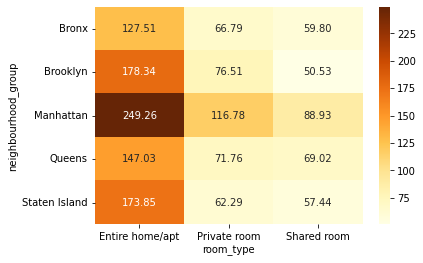

In [ ]:
sns.heatmap(price_mean_group , cmap='YlOrBr', annot=True,fmt = '.2f')

longtitude vs latitude group with neighbourhood_group

<Figure size 1080x504 with 0 Axes>

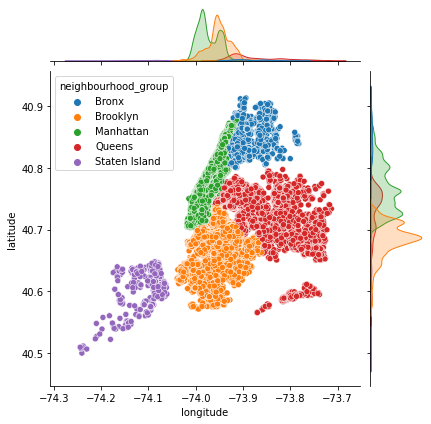

<Figure size 1080x504 with 0 Axes>

In [ ]:
g = sns.jointplot(x = 'longitude', y ='latitude' , data = nyc_booking_df,hue = 'neighbourhood_group',kind='scatter')
plt.figure(figsize=(15,7))

In [ ]:
nyc_booking_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

## Deep Analysis

#### Hypothesis

##### Does the room's availability effect to room's price?  (Use bootstrap tecinque)

In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:

select_df = nyc_booking_df.copy()
select_df['Room_Status'] = 0  # before half year
select_df.loc[(select_df['availability_365'] >= 183 ),'Room_Status'] = 1 # after half year

In [ ]:
#Create new row to compare the room's price
select_df['compare_price'] = 'Low Price'
select_df.loc[(select_df['price'] > 50), 'compare_price'] = 'High Price'

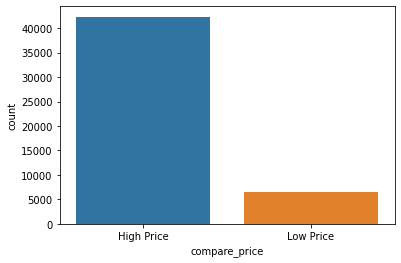

In [ ]:
sns.countplot(x = 'compare_price', data = select_df)

In [ ]:
#check the number of room status
count_status = select_df.groupby('Room_Status').size()
#get h0
a = count_status.get(1)
gA = select_df.sample(a)['compare_price']
gA

25567    High Price
7198     High Price
31787    High Price
17596     Low Price
9796     High Price
            ...    
27461     Low Price
18112    High Price
34954    High Price
14641    High Price
1732     High Price
Name: compare_price, Length: 14299, dtype: object

In [ ]:
gB = select_df.drop(gA.index)['compare_price']
gB

0        High Price
1        High Price
3        High Price
4        High Price
6        High Price
            ...    
48890    High Price
48891     Low Price
48892    High Price
48893    High Price
48894    High Price
Name: compare_price, Length: 34582, dtype: object

In [ ]:
gA.value_counts()

High Price    12405
Low Price      1894
Name: compare_price, dtype: int64

In [ ]:
gB.value_counts()

High Price    29918
Low Price      4664
Name: compare_price, dtype: int64

In [ ]:
x = (gA.value_counts().get(0)/gA.size) / (gB.value_counts().get(0) / gB.size)
x

1.0027868981239119

In [ ]:
#resample 1000 times 
res = []
for x in range(1000):
    gA = select_df.sample(a)['price']
    gB = select_df.drop(gA.index)['price']
    res.append((gA.sum() / gA.size) / (gB.sum() / gB.size))
resample_diff = pd.Series(res)

In [ ]:
resample_diff

0      1.010040
1      1.010876
2      1.015803
3      1.004472
4      1.003344
         ...   
995    0.982019
996    0.999383
997    1.003438
998    1.003604
999    0.995815
Length: 1000, dtype: float64

plot the score to understand this visually

(array([  6.,  25.,  97., 195., 249., 202., 126.,  69.,  25.,   6.]),
 array([0.95208025, 0.96216331, 0.97224638, 0.98232944, 0.9924125 ,
        1.00249557, 1.01257863, 1.02266169, 1.03274476, 1.04282782,
        1.05291089]),
 <a list of 10 Patch objects>)

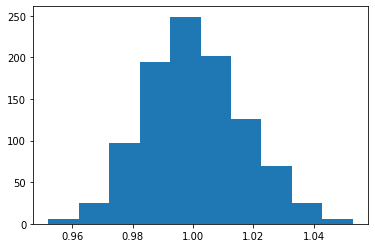

In [ ]:
plt.hist(resample_diff)

find the confident interval
p-value and compare with alpha = 0.5



In [ ]:
sum(resample_diff >= x)

0

In [ ]:
alpha = 0.05
p_value = sum(resample_diff >= x) / len(resample_diff)
print('pvalue : {}'.format(p_value))
if p_value<= alpha:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

pvalue : 0.0
reject null hypothesis


In [ ]:
#using library for bootstrap
from sklearn.utils import resample
select_2 = select_df.loc[:,['Room_Status','compare_price']]


##### Does the price affect the number of reviews

In [ ]:
low_price = nyc_booking_df[nyc_booking_df['price'] <  np.median(nyc_booking_df['price'])]
high_price = nyc_booking_df[nyc_booking_df['price'] >=  np.median(nyc_booking_df['price'])]

In [ ]:
alpha = 0.05
tstat,p_value = stats.ttest_ind(low_price['number_of_reviews'],high_price['number_of_reviews'], equal_var=True)
print('t stat : {} , p_value : {}'.format(tstat,p_value))
if p_value<= alpha:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

t stat : 6.472753054479806 , p_value : 9.714171309973106e-11
reject null hypothesis


### Machiene Learning
X (input) = 'number_of_reviews','reviews_per_month','price','calculated_host_listings_count','latitude', 'longitude'


y = (output) = 'price'

##### Find a test cases

In [ ]:
nyc_booking_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
select2 = nyc_booking_df.copy()
X = select2[['number_of_reviews','reviews_per_month','price','calculated_host_listings_count','latitude', 'longitude']]
y = select2.availability_365

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.head()

,number_of_reviews,reviews_per_month,price,calculated_host_listings_count,latitude,longitude
14903,1,0.03,100,1,40.66432,-73.98847
13391,4,0.10,70,1,40.73839,-73.93000
2228,31,0.43,190,2,40.81241,-73.94371
23274,21,0.87,51,1,40.81711,-73.93563
28843,2,0.11,150,1,40.74788,-73.98376


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_test.head()
y_train.head()

14903     0
13391    25
2228     84
23274     0
28843     0
Name: availability_365, dtype: int64

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train.head(10)

,number_of_reviews,reviews_per_month,price,calculated_host_listings_count,latitude,longitude
14903,1,0.03,100,1,40.66432,-73.98847
13391,4,0.10,70,1,40.73839,-73.93000
2228,31,0.43,190,2,40.81241,-73.94371
23274,21,0.87,51,1,40.81711,-73.93563
28843,2,0.11,150,1,40.74788,-73.98376
41816,0,0.00,62,5,40.72004,-73.99486
38596,3,0.98,200,1,40.80623,-73.95343
32206,28,2.04,150,1,40.68273,-73.91651
40213,15,2.53,120,1,40.66069,-73.94732
48531,0,0.00,100,1,40.68183,-73.96464


##### K NeighborsClassifier

In [ ]:
#แบ่งใน sklearn ใน neibor import จาก KNeighbors 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
#k = 9
knn = KNeighborsClassifier(n_neighbors=9) 
knn.fit(X_train,y_train) 

KNeighborsClassifier(n_neighbors=9)

In [ ]:
knn.predict(X_test)

array([0, 0, 0, ..., 3, 0, 0])

Find the accuracy score

In [ ]:
knn.score(X_test,y_test)
print('Accuracy score = {}'.format(knn.score(X_test,y_test)))

Accuracy score = 0.35051651835941494


##### K-Fold Cross-validation

In [ ]:
# K-Fold Cross-validation
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=10, random_state=1, shuffle=True)
knn_f = KNeighborsClassifier(n_neighbors= 9) # classifier (no fit)
score = cross_val_score(knn_f, X, y, cv = cv) # cv = k (amount of test cases)

print("Accuracy score :")
print("mean = {} , std = {}".format(np.mean(score), np.std(score)))

Accuracy score :
mean = 0.3528978887773381 , std = 0.0038305227375763917


##### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

Model Evaluation 

In [ ]:
print(lm.intercept_)

25583.19122149562


In [ ]:
coeff_df = pd.DataFrame(lm.coef_ , X.columns , columns=['Coefficient'])
coeff_df

,Coefficient
number_of_reviews,0.411327
reviews_per_month,6.715328
price,0.052303
calculated_host_listings_count,0.992916
latitude,-54.480896
longitude,314.846649


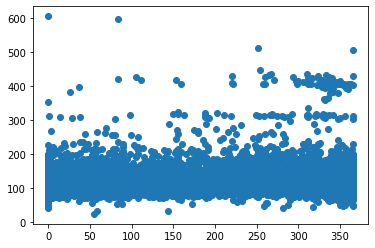

In [ ]:
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)

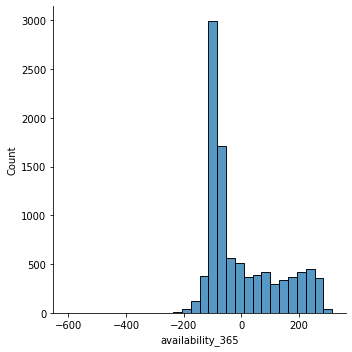

In [ ]:
sns.displot((y_test-predictions),bins=30);

##### Regression Evaluation Metrics

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 105.63036841252902
MSE: 15380.153986060255
RMSE: 124.01674881265133
